In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [27]:
def column_info(data):
    cols=[]
    dtype=[]
    unique=[]
    nunique=[]
    nulls=[]
    null_per=[]
    for col in data.columns:
        cols.append(col)
        dtype.append(data[col].dtype)
        unique.append(data[col].unique())
        nunique.append(data[col].nunique())
        nulls.append(data[col].isna().sum())
        null_per.append(data[col].isna().sum()/len(data))
    return pd.DataFrame({'cols': cols, 'dtype': dtype,'unique': unique,'nunique': nunique,'nulls': nulls,'null_per': null_per})

In [7]:
len (data)

1460

In [28]:
pd.set_option('display.max_rows', None)
column_info(data)

,cols,dtype,unique,nunique,nulls,null_per
0,Id,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",1460,0,0.0
1,MSSubClass,float64,"[60.0, 20.0, 70.0, 50.0, 190.0, 45.0, 90.0, 12...",15,0,0.0
2,MSZoning,object,"[RL, RM, C (all), FV, RH]",5,0,0.0
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69....",110,0,0.0
4,LotArea,float64,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 141...",1073,0,0.0
5,Street,object,"[Pave, Grvl]",2,0,0.0
6,LotShape,object,"[Reg, IR1, IR2, IR3]",4,0,0.0
7,LandContour,object,"[Lvl, Bnk, Low, HLS]",4,0,0.0
8,Utilities,object,"[AllPub, NoSeWa]",2,0,0.0
9,LotConfig,object,"[Inside, FR2, Corner, CulDSac, FR3]",5,0,0.0


In [16]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
for col in data.columns:
    if data[col].dtype == 'object':
        imputer= SimpleImputer(missing_values=np.nan,strategy='most_frequent')
        data[col]=imputer.fit_transform(data[col].values.reshape(-1,1))
                                        
    else: 
        imputer= SimpleImputer(missing_values=np.nan,strategy='median')
        data[col]=imputer.fit_transform(data[col].values.reshape(-1,1))
        
                               

In [29]:
column_info(data)

,cols,dtype,unique,nunique,nulls,null_per
0,Id,float64,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",1460,0,0.0
1,MSSubClass,float64,"[60.0, 20.0, 70.0, 50.0, 190.0, 45.0, 90.0, 12...",15,0,0.0
2,MSZoning,object,"[RL, RM, C (all), FV, RH]",5,0,0.0
3,LotFrontage,float64,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69....",110,0,0.0
4,LotArea,float64,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 141...",1073,0,0.0
5,Street,object,"[Pave, Grvl]",2,0,0.0
6,LotShape,object,"[Reg, IR1, IR2, IR3]",4,0,0.0
7,LandContour,object,"[Lvl, Bnk, Low, HLS]",4,0,0.0
8,Utilities,object,"[AllPub, NoSeWa]",2,0,0.0
9,LotConfig,object,"[Inside, FR2, Corner, CulDSac, FR3]",5,0,0.0


In [26]:
import warnings
warnings.filterwarnings("ignore")

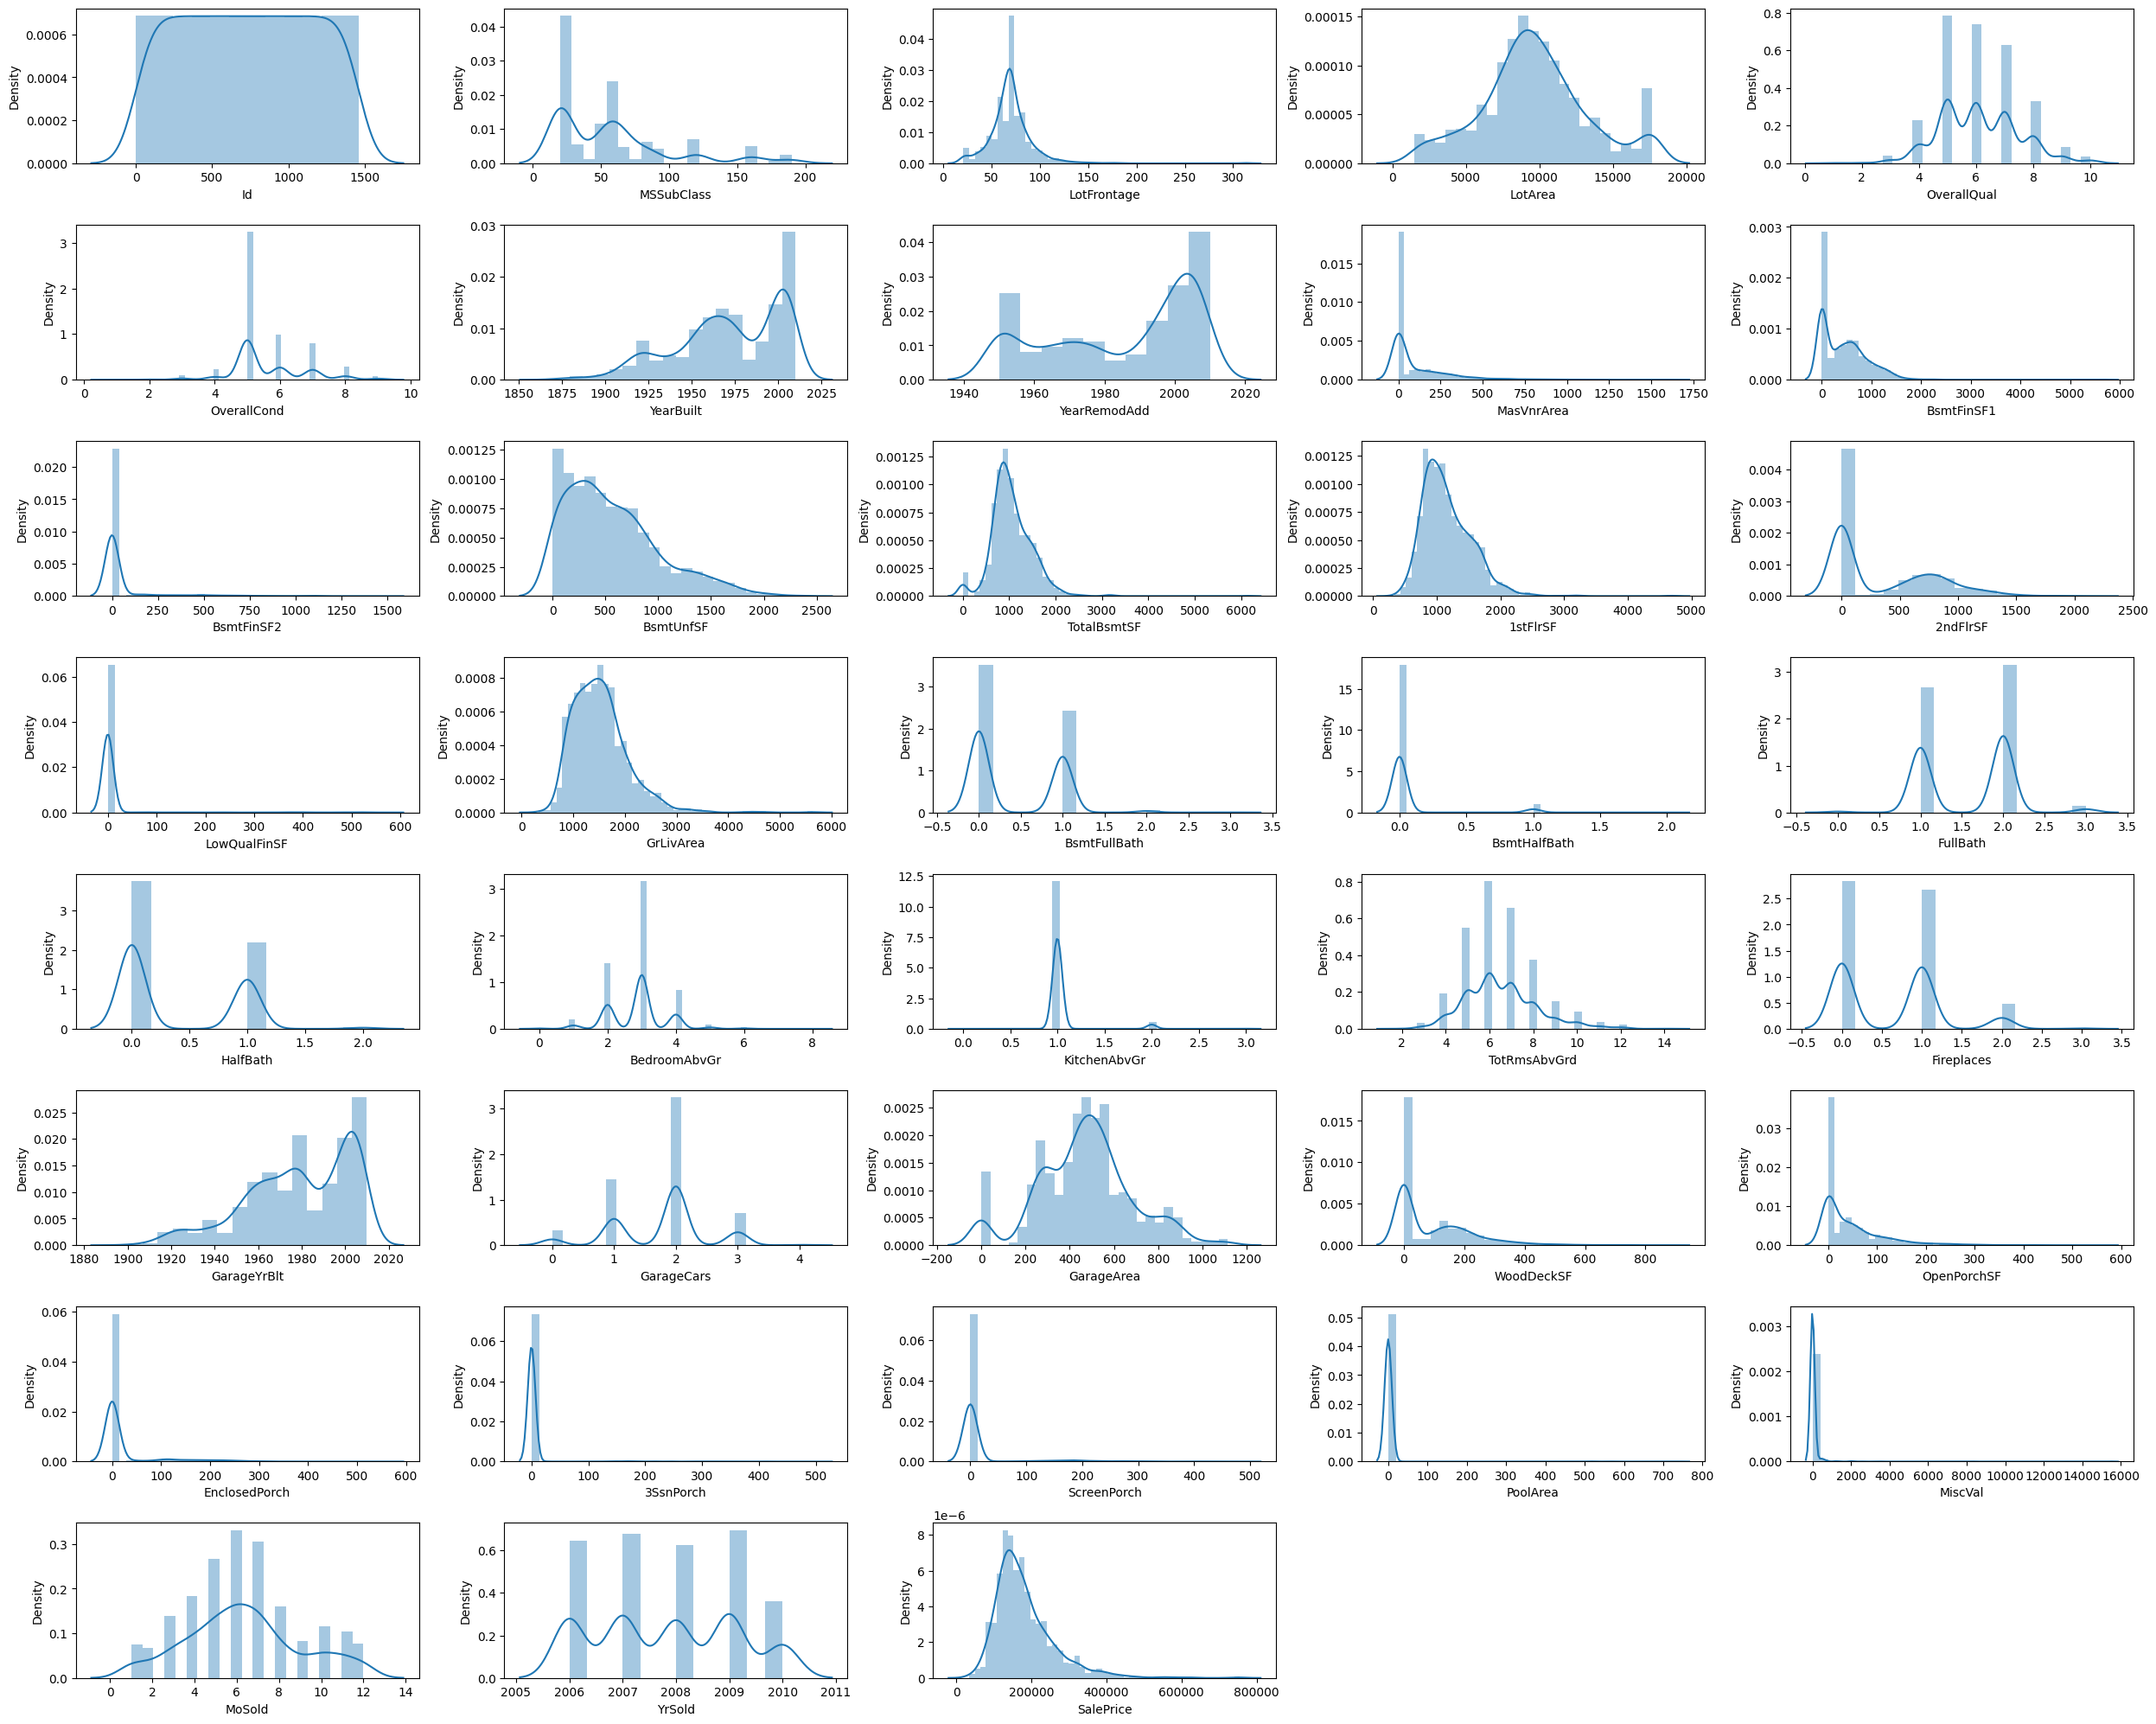

In [55]:
import seaborn as sns
i=1
plt.figure(figsize=(25,20))
for col in data.columns:
    if data[col].dtype!='object':
        plt.subplot(8,5,i)
        sns.distplot(data[col])
        i+=1
plt.tight_layout(pad=0.9)
plt.show()



<AxesSubplot:xlabel='LotArea', ylabel='Density'>

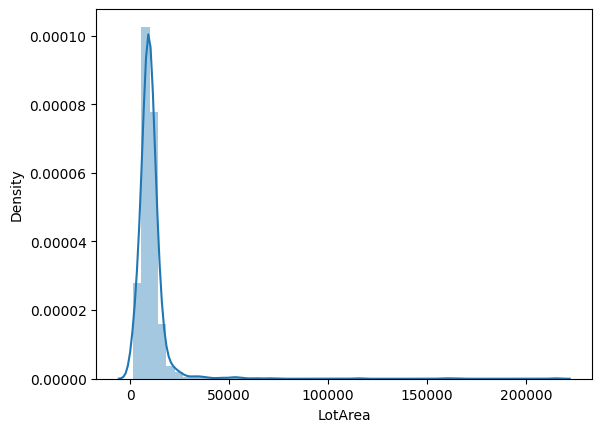

In [34]:
 sns.distplot(data['LotArea'])


In [38]:
def check_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    outliers=[]
    for i in range (len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
    return outliers
            
    

In [39]:
check_outliers('LotArea',data)

[50271.0,
 19900.0,
 21000.0,
 21453.0,
 19378.0,
 31770.0,
 22950.0,
 25419.0,
 159000.0,
 19296.0,
 39104.0,
 19138.0,
 18386.0,
 215245.0,
 164660.0,
 20431.0,
 18800.0,
 53107.0,
 34650.0,
 22420.0,
 21750.0,
 70761.0,
 53227.0,
 40094.0,
 32668.0,
 21872.0,
 21780.0,
 25095.0,
 46589.0,
 20896.0,
 18450.0,
 21535.0,
 26178.0,
 115149.0,
 21695.0,
 53504.0,
 21384.0,
 28698.0,
 45600.0,
 17920.0,
 25286.0,
 27650.0,
 24090.0,
 25000.0,
 1300.0,
 21286.0,
 1477.0,
 21750.0,
 29959.0,
 18000.0,
 23257.0,
 17755.0,
 35760.0,
 18030.0,
 35133.0,
 32463.0,
 18890.0,
 24682.0,
 23595.0,
 17871.0,
 36500.0,
 63887.0,
 20781.0,
 25339.0,
 57200.0,
 20544.0,
 19690.0,
 21930.0,
 26142.0]

In [41]:
def handle_outliers(col,data):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    lower_b=q1-1.5*IQR
    upper_b=q3+1.5*IQR
    for i in range (len(data)):
        if data.loc[i,col]>upper_b:
            data.loc[i,col]=upper_b
            
        elif data.loc[i,col]<lower_b:
              data.loc[i,col]=lower_b
handle_outliers('LotArea',data)     
    

In [42]:
check_outliers('LotArea',data)

[]

In [45]:
def check_outlierss(col,data):
    mean=data[col].mean()
    st=data[col].std()
    lower_b=mean-3*st
    upper_b=mean+3*st
    outliers=[]
    for i in range (len(data)):
        if data.loc[i,col]>upper_b or data.loc[i,col]<lower_b:
            outliers.append(data.loc[i,col])
    return outliers
            
    

In [46]:
check_outlierss('GarageArea',data)

[1166.0, 1390.0, 1134.0, 1220.0, 1248.0, 1356.0, 1418.0]

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

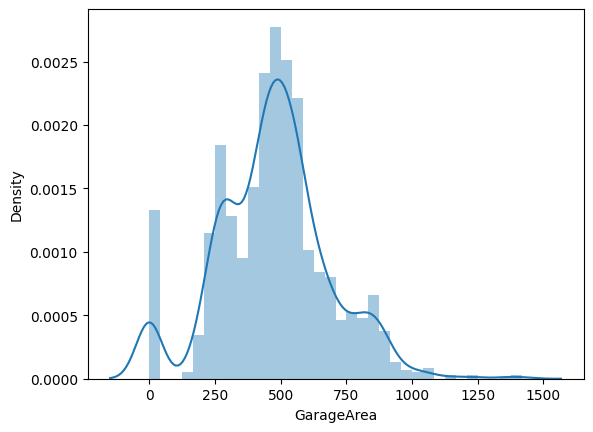

In [48]:
sns.distplot(data['GarageArea'])

In [51]:
def handle_outliers(col,data):
    mean=data[col].mean()
    st=data[col].std()
    lower_b=mean-3*st
    upper_b=mean+3*st
    outliers=[]
    for i in range (len(data)):
        if data.loc[i,col]>upper_b:
            data.loc[i,col]=upper_b
            
        elif data.loc[i,col]<lower_b:
              data.loc[i,col]=lower_b
handle_outliers('GarageArea',data)   

In [52]:
check_outlierss('GarageArea',data)

[1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427]

In [53]:
check_outliers('GarageArea',data)

[1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427,
 1114.3946613464427]

In [104]:
l=['MSSubClass','LotFrontage','LotArea','GrLivArea','SalePrice']
df=data[l]
df.head()

,MSSubClass,LotFrontage,LotArea,GrLivArea,SalePrice
0,60.0,65.0,8450.0,1710.0,208500.0
1,20.0,80.0,9600.0,1262.0,181500.0
2,60.0,68.0,11250.0,1786.0,223500.0
3,70.0,60.0,9550.0,1717.0,140000.0
4,60.0,84.0,14260.0,2198.0,250000.0


In [92]:
x=df.drop('SalePrice',axis=1)
y=df.iloc[:,[-1]].values

In [105]:
from sklearn.model_selection import train_test_split
train_x, test_x,train_y,test_y= train_test_split(x,y, test_size=0.2)

In [115]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)
model.score(test_x,test_y)


0.5621778384977163

In [116]:
LinearRegression()
y_pred = model.predict(test_x)

In [117]:
y_pred=model.predict(train_x)

In [118]:

print("R2:" ,r2_score(y_pred,train_y))

R2: 0.06421865099152702


In [126]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(min_samples_split=10,max_depth=3)
model.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=3, min_samples_split=10)

In [127]:
DecisionTreeRegressor()


DecisionTreeRegressor()

In [128]:
y_pred = model.predict(test_x)

In [132]:
model.score(test_x,test_y)

0.5246267753123495

In [134]:
print("R2:" ,r2_score(test_y,y_pred))

R2: 0.5246267753123495


In [124]:
y_pred=model.predict(train_x)

In [125]:

print("R2:" ,r2_score(y_pred,train_y))

R2: 0.1611288250705647
